In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
pd.set_option('display.max_columns', None)
import os

In [245]:
#Importing the data
final_df=pd.DataFrame()
a_df=pd.DataFrame()
b_df=pd.DataFrame()

for file_n in os.listdir('listings'):
    if file_n[0]=='.':
        continue
    else:
        add_df = pd.read_csv(f'listings/{file_n}')
        if len(add_df.columns)==106:
            final_df = pd.concat([final_df, add_df], axis=0)
        elif len(add_df.columns)==96:
            a_df = pd.concat([a_df, add_df], axis=0)
        else:
            b_df = pd.concat([b_df, add_df], axis=0)

In [246]:
#These are the columns not present in 2018 reports. They will be dropped.
not_in_2018 = ['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights',
       'minimum_nights_avg_ntm','maximum_nights_avg_ntm', 'number_of_reviews_ltm', 
       'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms', 
       'calculated_host_listings_count_shared_rooms']
sf_df = final_df.drop(columns=not_in_2018)
sf_df = pd.concat([sf_df, a_df], axis=0)

#drop one column not in 2017
sf_df = sf_df.drop(columns=['is_business_travel_ready'])
sf_df = pd.concat([sf_df, b_df], axis=0)

## Initial Look at the Data

In [247]:
sf_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,958,https://www.airbnb.com/rooms/958,20200313233841,2020-03-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,NaN,NaN,https://a0.muscache.com/im/pictures/b7c2a199-4...,NaN,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,100%,99%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,NaN,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",NaN,$170.00,"$1,120.00","$4,200.00",$100.00,$100.00,2,$25.00,1,30,yesterday,t,11,19,21,68,2020-03-14,237,2009-07-23,2020-02-28,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,moderate,f,f,1,1.83
1,5858,https://www.airbnb.com/rooms/5858,20200313233841,2020-03-14,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",NaN,NaN,https://a0.muscache.com/im/pictures/17714/3a7a...,NaN,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,83%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,NaN,San Francisco,CA,94110,San Francisco,"San Francisco, CA",US,United States,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,

In [232]:
sf_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283802 entries, 0 to 9056
Data columns (total 95 columns):
id                                  283802 non-null int64
listing_url                         283802 non-null object
scrape_id                           283802 non-null int64
last_scraped                        283802 non-null object
name                                283779 non-null object
summary                             275094 non-null object
space                               228409 non-null object
description                         283087 non-null object
experiences_offered                 283802 non-null object
neighborhood_overview               196296 non-null object
notes                               161233 non-null object
transit                             194904 non-null object
access                              184984 non-null object
interaction                         185179 non-null object
house_rules                         204205 non-null object
thumbnai

In [233]:
pd.set_option('display.max_rows', None)
sf_df.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [234]:
#Null Cells
pd.set_option('display.max_rows', None)
print(f'Total rows: {len(sf_df)}')
(sf_df.isnull().sum()/len(sf_df)).sort_values(ascending=False)

Total rows: 283802


neighbourhood_group_cleansed        1.000000
square_feet                         0.981286
host_acceptance_rate                0.916932
monthly_price                       0.837239
weekly_price                        0.812908
xl_picture_url                      0.716457
thumbnail_url                       0.716457
medium_url                          0.716457
license                             0.514049
notes                               0.431882
access                              0.348193
interaction                         0.347506
transit                             0.313240
security_deposit                    0.310417
neighborhood_overview               0.308335
house_rules                         0.280467
has_availability                    0.279237
host_about                          0.266429
host_response_rate                  0.199618
host_response_time                  0.199615
review_scores_value                 0.196651
review_scores_location              0.196517
review_sco

In [235]:
sf_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2.838020e+05,2.838020e+05,2.838020e+05,283531.000000,283531.000000,0.0,283802.000000,283802.000000,283802.000000,282951.000000,283670.000000,283367.000000,5311.000000,283802.000000,2.838020e+05,2.838020e+05,283802.000000,283802.000000,283802.000000,283802.000000,283802.000000,228466.000000,228228.000000,228272.000000,228037.000000,228275.000000,228030.000000,227992.000000,283802.00000,230412.000000
mean,1.459816e+07,2.018243e+13,4.199698e+07,47.268062,47.268062,NaN,37.766221,-122.430630,3.202779,1.331393,1.354098,1.754506,979.300508,1.693364,9.877369e+03,1.467017e+05,8.882739,21.367277,35.820304,142.586317,38.798187,95.257513,9.735514,9.582686,9.845187,9.827590,9.627032,9.407773,12.67193,1.859972
std,1.064679e+07,1.044769e+10,6.084834e+07,232.317153,232.317153,NaN,0.022617,0.026455,1.982605,0.815830,0.966827,1.219828,746.800995,1.335995,9.932317e+05,1.713068e+07,10.591711,21.588812,32.867684,133.733812,67.028405,7.039861,0.684514,0.815349,0.542456,0.584492,0.722504,0.806668,40.29134,2.148907
min,9.580000e+02,2.017010e+13,2.800000e+01,0.000000,0.000000,NaN,37.704145,-122.513065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.00000,0.000000
25%,5.561522e+06,2.017090e+13,3.645466e+06,1.000000,1.000000,NaN,37.751512,-122.442832,2.000000,1.000000,1.000000,1.000000,450.000000,1.000000,2.000000e+00,2.800000e+01,0.000000,0.000000,0.000000,9.000000,1.000000,94.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.00000,0.350000
50%,1.354931e+07,2.018091e+13,1.417116e+07,2.000000,2.000000,NaN,37.768061,-122.425370,2.000000,1.000000,1.000000,1.000000,840.000000,1.000000,3.000000e+00,1.800000e+02,4.000000,15.000000,30.000000,92.000000,10.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.00000,1.090000
75%,2.157844e+07,2.019081e+13,5.150789e+07,4.000000,4.000000,NaN,37.785206,-122.411517,4.000000,1.500000,2.000000,2.000000,1400.000000,2.000000,3.000000e+01,1.125000e+03,16.000000,39.000000,66.000000,279.000000,45.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.00000,2.800000
max,4.312629e+07,2.020041e+13,3.428298e+08,2347.000000,2347.000000,NaN,37.832042,-122.363243,16.000000,15.000000,30.000000,30.000000,5500.000000,30.000000,1.000000e+08,2.147484e+09,30.000000,60.000000,90.000000,365.000000,821.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,301.00000,223.000000


# Data Cleaning & Exploration

In [248]:
pd.set_option('display.max_rows', 20)
#Converting Existing Data Columns to Dates
sf_df['last_scraped'] = pd.to_datetime(sf_df['last_scraped'])
sf_df['host_since'] = pd.to_datetime(sf_df['host_since'])
#Adding new date features
sf_df['year'] = sf_df['last_scraped'].transform(lambda x: x.year)
sf_df['month-year'] = sf_df['last_scraped'].transform(lambda x: f'{x.month} {x.year}')
sf_df['month'] = sf_df['last_scraped'].transform(lambda x: x.month)
sf_df['day_of_week'] = sf_df['last_scraped'].transform(lambda x: x.dt.dayofweek)
sf_df['day'] = sf_df['last_scraped'].transform(lambda x: x.day)

#Converting All Price Related Columns from Objects to Floats
sf_df['price'] = sf_df['price'].transform(lambda x: float(x.replace(',', '').replace('$', '')))
sf_df['extra_people'] = sf_df['extra_people'].transform(lambda x: float(x.replace(',', '').replace('$', '')))

#Cannot convert below due to NANs, NANs less than 75%
# sf_df['security_deposit'] = sf_df['security_deposit'].transform(lambda x: float(x.replace(',', '').replace('$', '')))
# sf_df['cleaning_fee'] = sf_df['cleaning_fee'].transform(lambda x: float(x.replace(',', '').replace('$', '')))

In [249]:
#Dropping columns that have over 75% null
over_70_null = sf_df.columns[sf_df.isnull().sum()/len(sf_df) > 0.70]
sf_df = sf_df.drop(columns=over_70_null)

In [250]:
#View of cleaned data for reference
sf_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,year,month-year,month,day_of_week,day
0,958,https://www.airbnb.com/rooms/958,20200313233841,2020-03-14,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,*Public Transportation is 1/2 block away. *Ce...,*Full access to patio and backyard (shared wit...,A family of 4 lives upstairs with their dog. N...,* No Pets - even visiting guests for a short t...,https://a0.muscache.com/im/pictures/b7c2a199-4...,1169,https://www.airbnb.com/users/show/1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family with 2 boys born in 2009 and 2...,within an hour,100%,t,https://a0.muscache.com/im/pictures/user/efdad...,https://a0.muscache.com/im/pictures/user/efdad...,Duboce Triangle,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"San Francisco, CA, United States",Lower Haight,Western Addition,San Francisco,CA,94117,San Francisco,"San Francisco, CA",US,United States,37.76931,-122.43386,t,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Pets liv...",170.0,$100.00,$100.00,2,25.0,1,30,yesterday,t,11,19,21,68,2020-03-14,237,2009-07-23,2020-02-28,97.0,10.0,10.0,10.0,10.0,10.0,9.0,t,STR-0001256,"{""SAN FRANCISCO""}",t,moderate,f,f,1,1.83,2020,3 2020,3,5,14
1,5858,https://www.airbnb.com/rooms/5858,20200313233841,2020-03-14,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,The train is two blocks away and you can stop ...,"Our deck, garden, gourmet kitchen and extensiv...",NaN,"Please respect the house, the art work, the fu...",https://a0.muscache.com/im/pictures/17714/3a7a...,8904,https://www.airbnb.com/users/show/8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,100%,f,https://a0.muscache.com/im/users/8904/profile_...,https://a0.muscache.com/im/users/8904/profile_...,Bernal Heights,2.0,2.0,"['email', 'phone', 'reviews', 'kba', 'work_ema...",t,t,"San Francisco, CA, United States",Bernal Heights,Bernal Heights,San Francisco,CA,94110,San Francisco,"San Francisco, CA",US,United States,37.74511,-122.42102,t,Apartment,Entire home/apt,5,1.0,2.0,3.0,Real Bed,"{Internet,Wifi,Kitchen,Heating,""Family/kid fri...",235.0,NaN,$100.00,2,0.0,30,60,3 months ago,t,0,0,0,0,2020-03-14,111,2009-05-03,2017-08-06,98.0,10.0,10.0,10

### Spike in Airbnb Rentals in 2017 were strongly linked to rent increases in some of the largest US metro areas

In [429]:
#NOTE TO SELF: 2018 IS MISSING JUNE DATA/LISTINGS
sf_df['year'].value_counts()

2017    101697
2019     85109
2018     63088
2020     33908
Name: year, dtype: int64

In [432]:
sf_df[sf_df==0].count().sort_values(ascending=False).head(20)

extra_people                 159329
availability_30              109543
availability_60               85739
availability_90               73926
availability_365              56272
number_of_reviews             53213
day_of_week                   31416
bedrooms                      28380
host_listings_count            4425
host_total_listings_count      4425
beds                           2933
bathrooms                      1966
guests_included                 398
price                           190
reviews_per_month                 1
accommodates                      1
host_has_profile_pic              0
host_response_time                0
host_neighbourhood                0
host_picture_url                  0
dtype: int64

## Train Test Split

In [428]:
train_df = sf_df[sf_df['year'] != 2020]
test_df = sf_df[sf_df['year'] == 2020]

id              0.0
listing_url     0.0
scrape_id       0.0
last_scraped    0.0
name            0.0
               ... 
year            0.0
month-year      0.0
month           0.0
day_of_week     0.0
day             0.0
Length: 92, dtype: float64

In [314]:
pd.set_option('display.max_rows', 50)

## Data Visualizations

Text(0, 0.5, 'Average Daily Price of Listing')

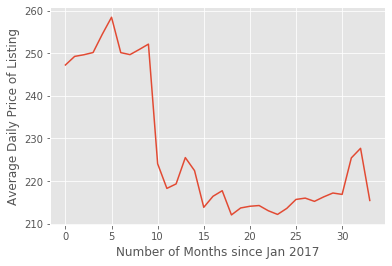

In [303]:
labels = train_df.sort_values('last_scraped')['month-year'].unique()
data = train_df.groupby(['year','month']).mean()['price']
fig, ax = plt.subplots()
ax.plot(data.values)
ax.set_xlabel('Number of Months since Jan 2017')
ax.set_ylabel('Average Daily Price of Listing')
# ax.set_xticks(labels)

Text(0.5, 1.0, 'Average Daily Rates in SF per year')

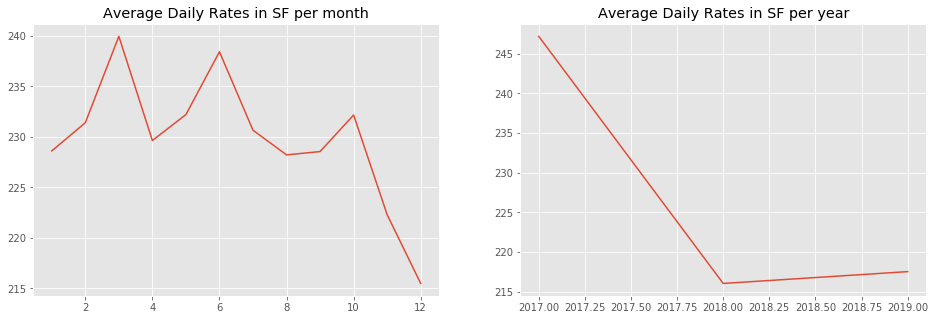

In [305]:
fig, ax = plt.subplots(1,2, figsize=(16,5))
ax[0].plot(train_df.groupby('month').mean()['price'])
ax[0].set_title('Average Daily Rates in SF per month')
ax[1].plot(train_df.groupby('year').mean()['price'])
ax[1].set_title('Average Daily Rates in SF per year')

Text(0, 0.5, 'Frequency')

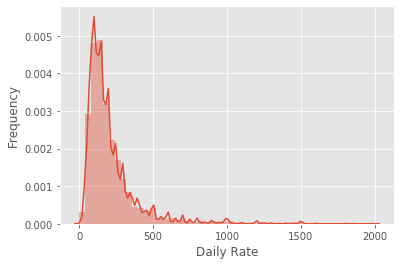

In [452]:
#Pretty right skewed, may need to convert to log
outlier_cutoff = 2000
sns.distplot(train_df[train_df['price']<outlier_cutoff]['price'])
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

Text(0.5, 0, 'Log of Daily Airbnb Prices')

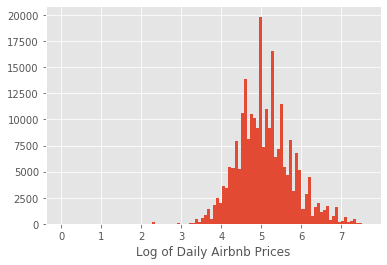

In [453]:
# #Why are we getting negative log?
crt1 = (train_df['price']<outlier_cutoff)
crt2 = (train_df['price']>0)
x = np.log((train_df[crt1 & crt2]['price']))
x.hist(bins=100)
plt.xlabel('Log of Daily Airbnb Prices')
# train_df[train_df['price']==0] #Note to self, need to remove/deal with 0
#More normal distribution. Can decide how to deal with the 0's 

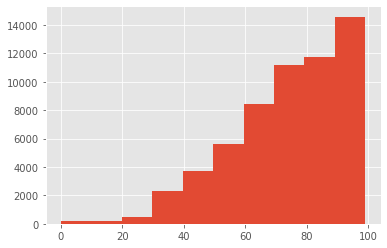

In [447]:
train_df[train_df['price']<100]['price'].hist()

Outlier Cutoff: 2000, Pct Outliers: 0.0036135321376263535


Text(0, 0.5, 'Frequency')

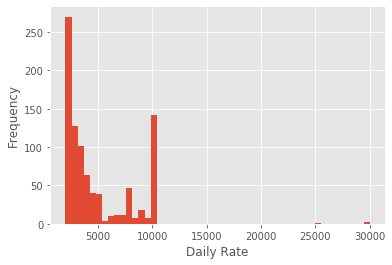

In [454]:
#Visualizing outliers
print(f"Outlier Cutoff: {outlier_cutoff}, Pct Outliers: {train_df[train_df['price']>outlier_cutoff]['price'].count()/len(train_df)}")

train_df[train_df['price']>outlier_cutoff]['price'].hist(bins=50)
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

In [456]:
numeric_data = train_df.select_dtypes(include=[np.number])
cat_data = train_df.select_dtypes(exclude=[np.number])
print ("There are {} numeric and {} categorical columns in train data".format(numeric_data.shape[1],cat_data.shape[1]))

There are 34 numeric and 58 categorical columns in train data


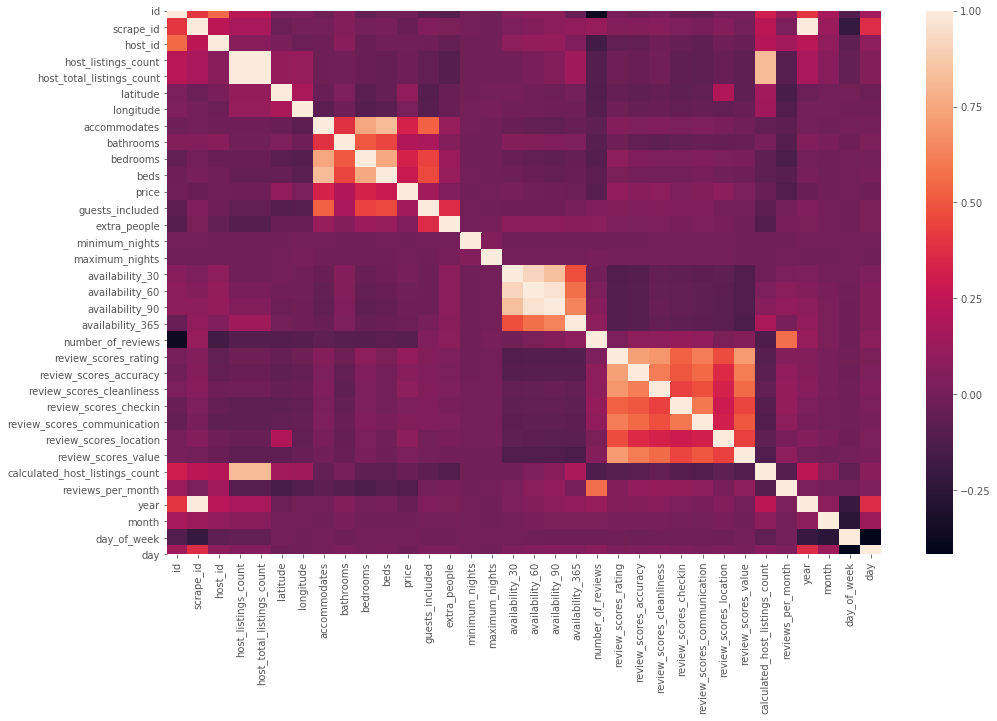

In [458]:
fig, ax = plt.subplots(figsize=(16,10))
corr = numeric_data.corr()
sns.heatmap(corr)